In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
df=pd.read_csv('/content/Instagram-Reach.csv')
df

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532
...,...,...
360,2023-03-27T00:00:00,15622
361,2023-03-28T00:00:00,18645
362,2023-03-29T00:00:00,41238
363,2023-03-30T00:00:00,50490


In [19]:
df.head()

,Date,Instagram reach
0,2022-04-01T00:00:00,7620
1,2022-04-02T00:00:00,12859
2,2022-04-03T00:00:00,16008
3,2022-04-04T00:00:00,24349
4,2022-04-05T00:00:00,20532


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             365 non-null    object
 1   Instagram reach  365 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.8+ KB


In [21]:
df.describe()

,Instagram reach
count,365.000000
mean,50474.712329
std,30051.787552
min,7620.000000
25%,25070.000000
50%,43987.000000
75%,68331.000000
max,161998.000000


In [22]:
df.columns

Index(['Date', 'Instagram reach'], dtype='object')

In [23]:
df.isna().sum()

Date               0
Instagram reach    0
dtype: int64

In [24]:
df['Date']=pd.to_datetime(df['Date'])

In [25]:
df['Date']
df

,Date,Instagram reach
0,2022-04-01,7620
1,2022-04-02,12859
2,2022-04-03,16008
3,2022-04-04,24349
4,2022-04-05,20532
...,...,...
360,2023-03-27,15622
361,2023-03-28,18645
362,2023-03-29,41238
363,2023-03-30,50490


Instagram reach trends

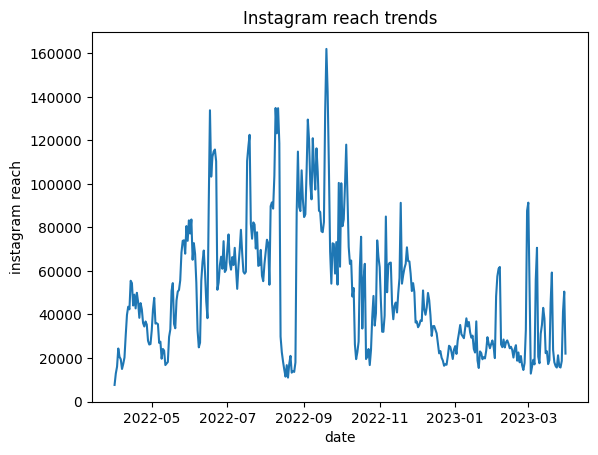

In [26]:
plt.xlabel('date')
plt.ylabel('instagram reach')
plt.title('Instagram reach trends')
x=df['Date']
y=df['Instagram reach']

plt.plot(x,y)

instagram reach by day

<BarContainer object of 365 artists>

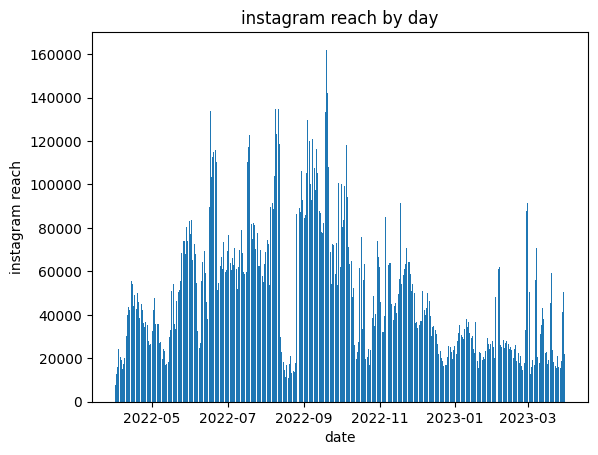

In [27]:
plt.xlabel('date')
plt.ylabel('instagram reach')
plt.title('instagram reach by day')
x=df['Date']
y=df['Instagram reach']

plt.bar(x,y)

Now analyze the distribution of instagram reach

<Axes: title={'center': 'instagram reach box plot'}, xlabel='instagram reach', ylabel='instagram reach'>

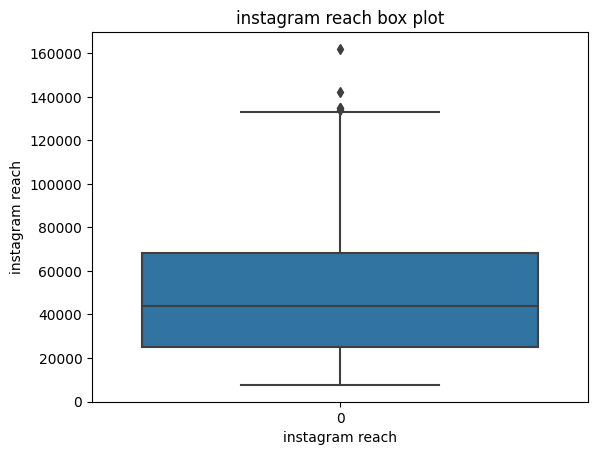

In [28]:
plt.xlabel('instagram reach')
plt.ylabel('instagram reach')
plt.title('instagram reach box plot')
y=df['Instagram reach']
sns.boxplot(y)

Now let’s create a day column and analyze reach based on the days of the week.

In [29]:
df['Day']=df['Date'].dt.day_name()

In [30]:
df.head()

,Date,Instagram reach,Day
0,2022-04-01,7620,Friday
1,2022-04-02,12859,Saturday
2,2022-04-03,16008,Sunday
3,2022-04-04,24349,Monday
4,2022-04-05,20532,Tuesday


Now let’s analyze the reach based on the days of the week

In [31]:
import numpy as np

day_stats = df.groupby('Day')['Instagram reach'].agg(['mean', 'median', 'std']).reset_index()
print(day_stats)

         Day          mean   median           std
0     Friday  46666.849057  35574.0  29856.943036
1     Monday  52621.692308  46853.0  32296.071347
2   Saturday  47374.750000  40012.0  27667.043634
3     Sunday  53114.173077  47797.0  30906.162384
4   Thursday  48570.923077  39150.0  28623.220625
5    Tuesday  54030.557692  48786.0  32503.726482
6  Wednesday  51017.269231  42320.5  29047.869685


Now, let’s create a bar chart to visualize the reach for each day of the week:

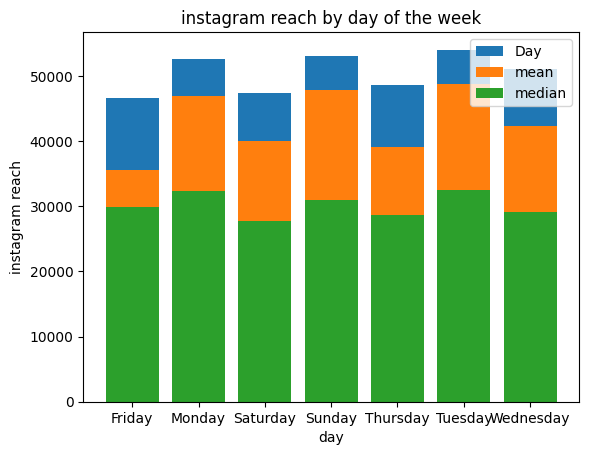

In [37]:
x=day_stats['Day']
y=day_stats['mean']
plt.bar(x,y)

x=day_stats['Day']
y=day_stats['median']
plt.bar(x,y)

x=day_stats['Day']
y=day_stats['std']
plt.bar(x,y)

plt.xlabel('day')
plt.ylabel('instagram reach')
plt.title('instagram reach by day of the week')
plt.legend(day_stats)

In [39]:
df

,Date,Instagram reach,Day
0,2022-04-01,7620,Friday
1,2022-04-02,12859,Saturday
2,2022-04-03,16008,Sunday
3,2022-04-04,24349,Monday
4,2022-04-05,20532,Tuesday
...,...,...,...
360,2023-03-27,15622,Monday
361,2023-03-28,18645,Tuesday
362,2023-03-29,41238,Wednesday
363,2023-03-30,50490,Thursday


In [40]:
writer = pd.ExcelWriter('output.xlsx')

In [41]:
df.to_excel(writer)

In [42]:
writer.save()
print('DataFrame is written successfully to Excel File.')

DataFrame is written successfully to Excel File.


<ipython-input-42-a23b5e58f680>:1: FutureWarning: save is not part of the public API, usage can give unexpected results and will be removed in a future version
  writer.save()
